# Environment Preparation
We recommend using [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) to prepare the environment. Please refer to the [install guide](../../UserGuide/python.md) for more details.

```bash
conda create py37 python==3.7.10 setuptools==58.0.4
conda activate py37
# nightly bulit version
pip install --pre --upgrade bigdl-nano[pytorch]
# set env variables for your conda environment
source bigdl-nano-init
```

Before you start with onnxruntime accelerator, you are required to install some onnx packages as follows to set up your environment with ONNXRuntime acceleration.
```bash
pip install onnx onnxruntime
```

### Step 0: Load data for demo

In [1]:
import torch
from torchvision.io import read_image
from torchvision import transforms

paths = ["./data/cat.jpg", "./data/dog.jpg"]
data_transform = transforms.Compose([transforms.RandomCrop(224),
                                     transforms.RandomHorizontalFlip(p=0.3),
                                     transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
data = []
for path in paths:
    data.append(data_transform(read_image(path)))

/opt/conda/envs/testVscode/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


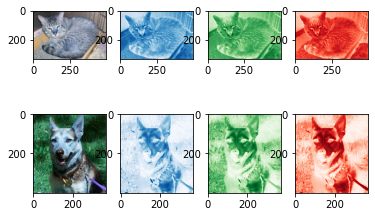

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
def quickLook(paths):
    _, sub = plt.subplots(nrows=len(paths), ncols=4, squeeze=False)
    for i, path in enumerate(paths):
        img = cv2.imread(path)
        b, r, g = cv2.split(img)
        sub[i, 0].imshow(img)
        sub[i, 1].imshow(b, cmap="Blues")
        sub[i, 2].imshow(r, cmap="Greens")
        sub[i, 3].imshow(g, cmap="Reds")
quickLook(paths)

In [3]:
import torch
import torch.nn as nn
from torchvision.models import resnet18
from bigdl.nano.pytorch.vision import transforms
class Predictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.resnet18=resnet18(pretrained=True)

    def forward(self, x):
        y_hat = self.resnet18(x)
        return y_hat.argmax(dim=1)

In [4]:
from bigdl.nano.pytorch import Trainer
predictor = Predictor()
predictor.eval()
ort_predictor = Trainer.trace(predictor, accelerator="onnxruntime", input_sample=torch.rand(1, 3, 224, 224))

In [5]:
batch = torch.stack(data)
output = predictor(batch)
ort_output = ort_predictor(batch)
assert(output.equal(ort_output))

AssertionError: 

In [7]:
from torchvision.io import read_image
from bigdl.nano.pytorch.vision import transforms

paths = ["./data/cat.jpg", "./data/dog.jpg"]
data_transform =  transforms.Compose([transforms.RandomCrop(224),
                                     transforms.RandomHorizontalFlip(p=0.3),
                                     transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
cat = data_transform(read_image(paths[0]))
dog = data_transform(read_image(paths[1]))

In [8]:
import torch
import torch.nn as nn
from torchvision.models import resnet18
# define your own model
class Predictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.resnet18=resnet18(pretrained=True)

    def forward(self, x):
        y_hat = self.resnet18(x)
        return y_hat.argmax(dim=1)

In [9]:
from bigdl.nano.pytorch import Trainer
predictor = Predictor()
ort_predictor = Trainer.trace(predictor, accelerator="onnxruntime", input_sample=torch.rand(1, 3, 224, 224))


In [11]:
batch = torch.stack([cat, dog])
output = predictor(batch)
ort_output = ort_predictor(batch)

In [12]:
output, ort_output

(tensor([415, 235]), tensor([106, 235]))